# Diffusion constant calculations using MSD method

In [30]:
import os
#import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [31]:
def linF(b,a,x):
    return b+a*x

In [32]:
# Function to calculate the Mean Square Displacement (MSD) for a given chunk
def msd_func(array, j, length,timestep):
    # Create an array to store results for each time step
    results = np.zeros((length, 2))
    # Loop through each time step to calculate MSD
    for i in range(length):
        # Calculate the displacement vector at time i
        displacement = array[j + i] - array[j]
        # Calculate the squared displacement (dot product)
        squared_displacement = np.dot(displacement, displacement)
        # Store time, MSD, and squared MSD in the results array
        results[i] = [i * timestep, squared_displacement]
    return results
##########################################################################################
# Function to average the MSD over multiple chunks
def average(array, length, chunks,timestep):
    # Initialize an array to store the averaged results
    average_results = np.zeros((length, 2))
    num_chunks = 0  # Counter for the number of chunks used in averaging

    # Loop through the array, calculating MSD for each chunk
    for j in range(0, chunks):
        # Add the MSD results from the current chunk to the average
        average_results += msd_func(array, j, length,timestep) # average_results = average_results + msd_func(array, j, length)
        num_chunks += 1  # num_chunks = num_chunks+ 1 

    print('Number of chunks averaged:', num_chunks)
    # Return the averaged MSD results
    return average_results / num_chunks


# Loading trajectory data. 
### It's position of center of mass of protein for 5000 frames(1ns)

In [33]:
traj=np.loadtxt("./coor_1ns_1000ps.dat")

# Parameters for MDS calculations

In [34]:
ns=len(traj)
timestep=0.2
length=1500
chunks=ns-length # 3500 
print('total number of frames:', ns)
print('length of MSD steps: ',length)
print('saving time:  ',timestep)
print('number of averagings(# of chuncks):',chunks)

total number of frames: 5000
length of MSD steps:  1500
saving time:   0.2
number of averagings(# of chuncks): 3500


# Calculate MSD 

In [35]:
#  average(array, length, chunks,timestep)
msd=average(traj,length,chunks,timestep) #
msd.shape

Number of chunks averaged: 3500


(1500, 2)

## Diffusion constant(D ) calculation using Einstein Relation

In [36]:
#############################################################
from scipy.stats import linregress
linear_model = linregress(msd[:,0],msd[:,1])
slope = linear_model.slope
#error = linear_model.stderr
intercept=linear_model.intercept
# dim_fac is 3 as we computed a 3D msd with 'xyz'
D = slope * 1/(6)
print("Diffusion constant:",D, r"$\AA^{3}/ps$")
#############################################################

Diffusion constant: 0.0030593647996941756 $\AA^{3}/ps$


## Plot of MSD vs time

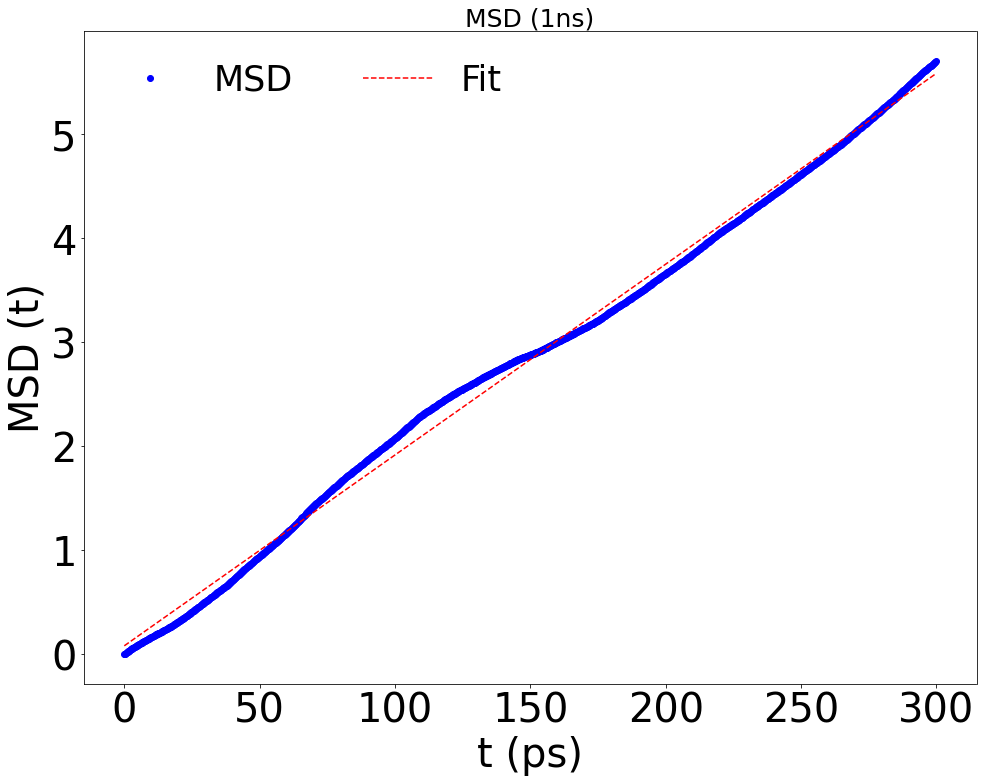

In [37]:
plt.figure(figsize=(16,12))
plt.plot(msd[:,0],msd[:,1],'ob',label='MSD')
plt.plot(msd[:,0],linF(intercept,slope,msd[:,0]),'--r',label='Fit')
#########################################################################
plt.xlabel("t (ps)",fontsize=40)
plt.ylabel(r"MSD (t)",fontsize=40)
plt.title("MSD (1ns)",fontsize=25)
plt.xticks(fontsize=40) 
plt.yticks(fontsize=40)
plt.legend(loc=0,fontsize=35,ncol=2, frameon=False)
plt.savefig("./MSD.pdf", dpi=1000 )
plt.savefig("./MSD.eps", dpi=1000 ,format='eps') 